<a href="https://colab.research.google.com/github/PhamTuanKiet02/report/blob/main/VND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from numpy import asarray, save
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from google.colab import drive

drive.mount('/content/drive')
folder = '/content/drive/MyDrive/VNmoney/'

photos, labels = [], []
for file in listdir(folder):
    if file.startswith('5000dmattruoc'):
        output = 0
    elif file.startswith('5000dmatsau'):
        output = 1
    elif file.startswith('10000dmattruoc'):
        output = 2
    elif file.startswith('10000dmatsau'):
        output = 3
    elif file.startswith('20000dmattruoc'):
        output = 4
    elif file.startswith('20000dmatsau'):
        output = 5
    elif file.startswith('50000dmattruoc'):
        output = 6
    elif file.startswith('50000dmatsau'):
        output = 7
    elif file.startswith('100000dmattruoc'):
        output = 8
    elif file.startswith('100000dmatsau'):
        output = 9
    elif file.startswith('500000dmattruoc'):
        output = 10
    elif file.startswith('500000dmatsau'):
        output = 11
    else:
        continue

    photo = load_img(folder + file, target_size=(100, 130))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

save('VNmoney_photos.npy', photos)
save('Vnmoney_labels.npy', labels)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 130, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, epochs=15, batch_size=40, verbose=1)

model.evaluate(photos, labels)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(12, 100, 130, 3) (12,)
Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 225.0205 - accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 23ms/step - loss: 2700.7656 - accuracy: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 0s 21ms/step - loss: 2212.3936 - accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 0s 25ms/step - loss: 1731.7842 - accuracy: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 0s 25ms/step - loss: 1073.5656 - accuracy: 0.0833
Epoch 6/15
1/1 [==============================] - 0s 27ms/step - loss: 587.8762 - accuracy: 0.1667
Epoch 7/15
1/1 [==============================] - 0s 23ms/step - loss: 346.4386 - accuracy: 0.0833
Epoch 8/15
1/1 [==============================] - 0s 24ms/step - loss: 172.4782 - accuracy: 0.1667
Epoch 9/15
1/1 [=====================

[0.2945410907268524, 0.8333333134651184]

In [ ]:
model.save('VNmoney.h5')

In [ ]:
classes = ["5000dmattruoc","5000dmatsau","10000dmattruoc","10000dmatsau","20000dmattruoc","20000dmatsau","50000dmatruoc","50000dmatsau","100000dmattruoc","100000dmatsau","500000dmattruoc","500000dmatsau"]

1/1 [==============================] - 0s 272ms/step
[[0.0177989  0.01708273 0.01935493 0.01638666 0.01782062 0.01855159
  0.01832683 0.01738179 0.01859402 0.01964939 0.01714355 0.01773172
  0.01525437 0.01465412 0.01470617 0.01530145 0.0172111  0.0163533
  0.01649383 0.01391275 0.01439527 0.01720125 0.01346439 0.01418153
  0.0151376  0.01448417 0.01420368 0.01487833 0.013903   0.01476592
  0.01501029 0.01625145 0.01516758 0.01444353 0.01288425 0.01499143
  0.01611757 0.01582036 0.01527447 0.01397204 0.01512671 0.01701246
  0.01484173 0.01388057 0.01367293 0.01486122 0.0140579  0.01524701
  0.0161424  0.01473051 0.01521102 0.01707488 0.01552812 0.01512261
  0.01474948 0.01574233 0.01733144 0.01417796 0.01491162 0.0147281
  0.0162374  0.01296685 0.01630213 0.01408471]]


'100000dmatsau'

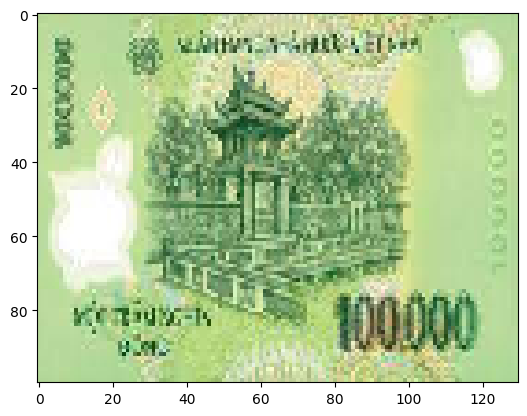

In [ ]:
img = load_img('/content/drive/MyDrive/nhandangmonan/100000dmatsau0.jpg', target_size=(100,130))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,100,130,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 26ms/step
[[0.01981377 0.02046349 0.02217516 0.01625182 0.01651774 0.01840278
  0.01882523 0.01806463 0.01848216 0.01834048 0.02508185 0.02011723
  0.01587613 0.01295649 0.01324354 0.01467678 0.01691807 0.01707309
  0.01634781 0.01310206 0.01431657 0.01713747 0.01187271 0.01294199
  0.0150295  0.01193393 0.01427558 0.01552252 0.01156837 0.01528931
  0.01343565 0.01529734 0.01559136 0.01426442 0.01397465 0.01735578
  0.01554738 0.01473196 0.01439329 0.01325561 0.01322396 0.01644026
  0.01444726 0.01261886 0.01133964 0.01926849 0.01426227 0.01601538
  0.01674808 0.01575516 0.01705827 0.0174651  0.01378707 0.01345075
  0.01273782 0.01434087 0.01950231 0.01473663 0.01498676 0.01366301
  0.01481344 0.01338444 0.01562609 0.01386231]]


'500000dmattruoc'

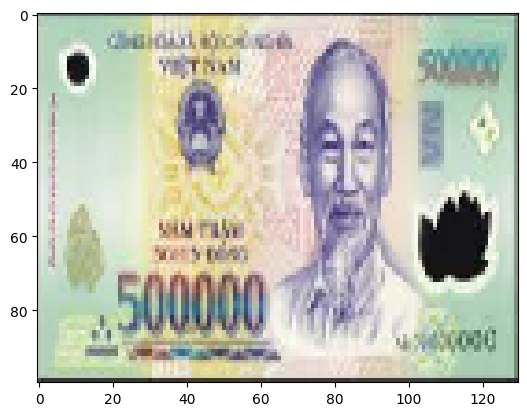

In [ ]:
img = load_img('/content/drive/MyDrive/nhandangmonan/500000mattruoc.jpg', target_size=(100,130))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,100,130,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]